In [1]:
from matplotlib.pyplot import *
from numpy import *
import numpy.random as npr
rcParams['text.usetex'] = True

In [2]:
import optics_design_workbench
from optics_design_workbench import distributions
from optics_design_workbench.distributions import *

[freecad.optics_design_workbench] python package path /usr/lib/python3.13/site-packages exists on filesystem but not in sys.path, appending to sys.path...
[freecad.optics_design_workbench] python package path /usr/lib/python3.12/site-packages exists on filesystem but not in sys.path, appending to sys.path...
[freecad.optics_design_workbench] python package path /usr/lib/python3.11/site-packages exists on filesystem but not in sys.path, appending to sys.path...


In [ ]:
optics_design_workbench

<module 'optics_design_workbench' from '/home/bredol/Projects/strahlemann/freecad/optics_design_workbench/__init__.py'>

# Ensure symmetry of grids (fans)

In [4]:
srv = distributions.ScalarRandomVariable('exp(-x**2)', variableDomain=(-5,5))

In [ ]:
Nwant = 51

In [6]:
X = srv.findGrid(N=Nwant)
densX = (X[1:]+X[:-1])/2
dens = 1/(X[1:]-X[:-1])
dens /= max(dens)

In [ ]:
len(X), Nwant

(51, 51)

In [ ]:
assert len(X)==Nwant

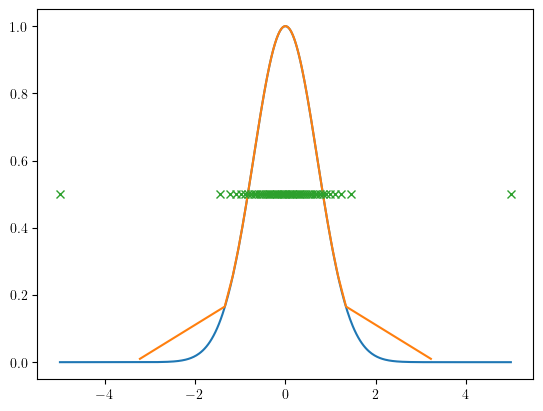

In [9]:
_X = linspace(-5,5,500)
_Y = exp(-_X**2)
plot(_X, _Y)
plot(densX, dens)
plot(X, [.5]*len(X), 'x')

### Make sure center is exactly zero

In [ ]:
X

array([-5.00000000e+00, -1.45221978e+00, -1.23792199e+00, -1.09939095e+00,
       -9.93535628e-01, -9.06193802e-01, -8.30841128e-01, -7.63901132e-01,
       -7.03187913e-01, -6.47260861e-01, -5.95116081e-01, -5.46023058e-01,
       -4.99431332e-01, -4.54913899e-01, -4.12131182e-01, -3.70807159e-01,
       -3.30712992e-01, -2.91655476e-01, -2.53468643e-01, -2.16007537e-01,
       -1.79143455e-01, -1.42760248e-01, -1.06751356e-01, -7.10173648e-02,
       -3.54639390e-02,  1.72060516e-13,  3.54639390e-02,  7.10173648e-02,
        1.06751356e-01,  1.42760248e-01,  1.79143455e-01,  2.16007537e-01,
        2.53468643e-01,  2.91655476e-01,  3.30712992e-01,  3.70807159e-01,
        4.12131182e-01,  4.54913899e-01,  4.99431332e-01,  5.46023058e-01,
        5.95116081e-01,  6.47260861e-01,  7.03187913e-01,  7.63901132e-01,
        8.30841128e-01,  9.06193802e-01,  9.93535628e-01,  1.09939095e+00,
        1.23792199e+00,  1.45221978e+00,  5.00000000e+00])

In [ ]:
abs(X[len(X)//2])

np.float64(1.7206051562229608e-13)

In [ ]:
assert abs(X[len(X)//2]) < 1e-9

# Make sure X plus reversed X is reasonably close to zero

[]

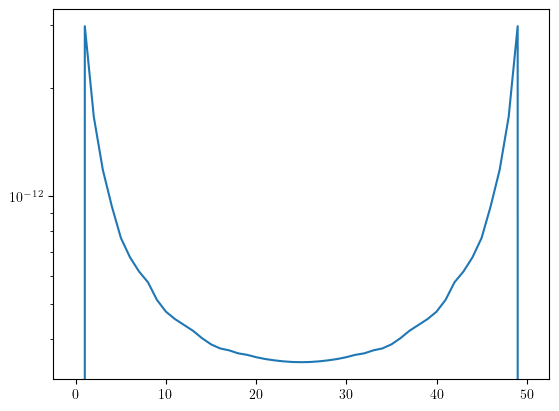

In [13]:
plot(abs(X+X[::-1]))
semilogy()

In [ ]:
assert max(abs(X+X[::-1])) < 1e-9

# Test smoothnes warning

In [15]:
x = distributions.ScalarRandomVariable('exp(-x**2)*cos(x)**2', variableDomain=(0,3))
x.draw(), x.mode()

(np.float64(0.08988868797141954), 'numeric')

In [16]:
x = distributions.ScalarRandomVariable('1/x**2', variableDomain=(-1,1))
x.draw(), x.mode()

numerical evaluation of probability density expression x**(-2) had jumps larger than 5.0%


[Optics Design 22:31:52.461488] failed to detect Qt version, used module "PySide6"


/home/bredol/Projects/strahlemann/freecad/optics_design_workbench/io.py:196: UserWarning: numerical evaluation of probability density expression x**(-2) had jumps larger than 5.0%
  warnings.warn(msg)


(np.float64(8.625913131669506e-07), 'numeric')

# Test random number generator API

not sure whether expression for probability density "exp(-x**2)*sin(x)" always yields positive values; negative probabilities will lead to undefined behavior
/home/bredol/Projects/strahlemann/freecad/optics_design_workbench/io.py:196: UserWarning: not sure whether expression for probability density "exp(-x**2)*sin(x)" always yields positive values; negative probabilities will lead to undefined behavior
  warnings.warn(msg)


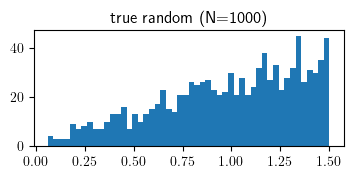

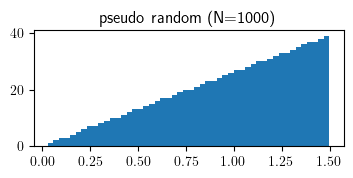

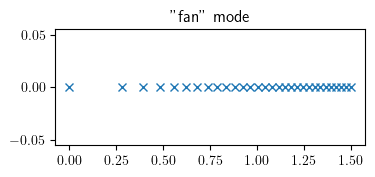

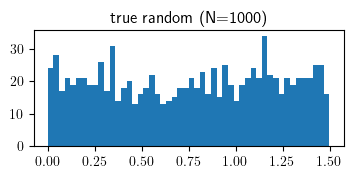

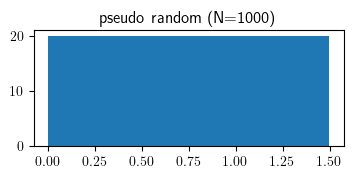

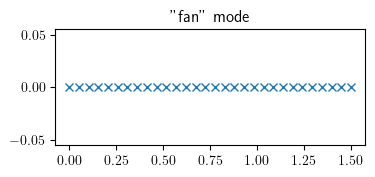

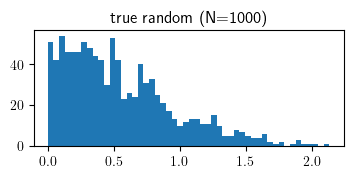

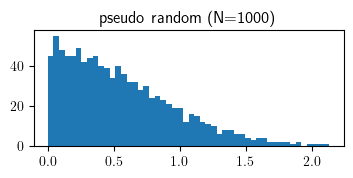

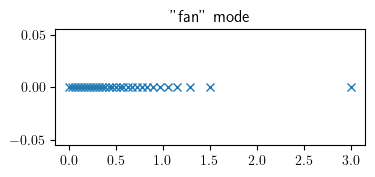

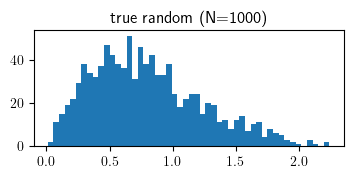

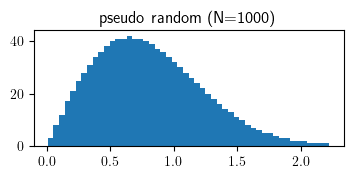

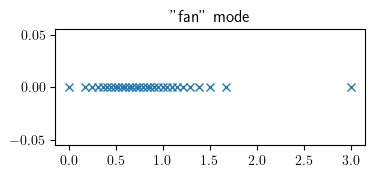

In [17]:
for x in [
  distributions.ScalarRandomVariable('x', variable='x', variableDomain=[0,1.5]),
  distributions.ScalarRandomVariable('1', variable='x', variableDomain=[0,1.5]),
  distributions.ScalarRandomVariable('exp(-x**2)', variable='x', variableDomain=[0,3]),
  distributions.ScalarRandomVariable('exp(-x**2)*sin(x)', variable='x', variableDomain=[0,3]),
]:
  X = x.draw(N=1e3)
  figure(figsize=(4,1.5))
  hist(X, bins=50)
  title(f'true random (N={len(X)})')
  
  X = x.drawPseudo(N=1e3, bins=50)
  figure(figsize=(4,1.5))
  hist(X, bins=50)
  title(f'pseudo random (N={len(X)})')

  X = x.findGrid(N=30)
  figure(figsize=(4,1.5))
  plot(X, 0*X, 'x')
  title('"fan" mode')


not sure whether expression for probability density "x - y" always yields positive values; negative probabilities will lead to undefined behavior


/home/bredol/Projects/strahlemann/freecad/optics_design_workbench/io.py:196: UserWarning: not sure whether expression for probability density "x - y" always yields positive values; negative probabilities will lead to undefined behavior
  warnings.warn(msg)


(1000,)
(1000,)


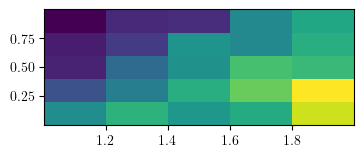

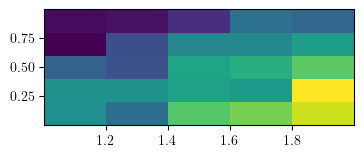

In [18]:
x = distributions.VectorRandomVariable('x - y', variableOrder=['x', 'y'], variableDomains=dict(x=(1,2), y=(0,1)))
figure(figsize=(4,1.5))
X, Y = x.draw(N=1e3)
hist2d(X, Y, bins=5)
print(X.shape)

figure(figsize=(4,1.5))
X, Y = x.drawPseudo(N=1e3)
hist2d(X, Y, bins=5)
print(X.shape)

# Test 1D point generators for given densities (ray fans)

Text(0, 0.5, 'density')

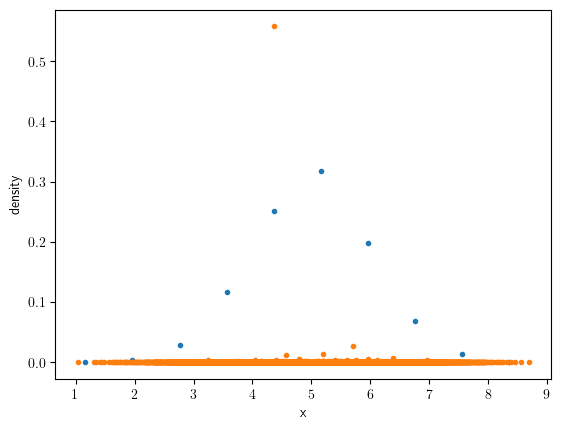

In [19]:
Xrand = npr.normal(5, 1, size=15000)
hX, hDensity = calcHistDensity(Xrand)
dX, dDensity = calcDiffDensity(Xrand)
plot(hX, hDensity, '.')
plot(dX, dDensity, '.')
xlabel('x')
ylabel('density')

### Gaussian

In [20]:
X = linspace(-1, 2, 500)
Y = exp(-5*X**2)
Xgen = generatePointsWithGivenDensity1D(density=(X,Y), N=20)
dX, dDens = calcDiffDensity(Xgen)

In [21]:
Xgen.shape

(20,)

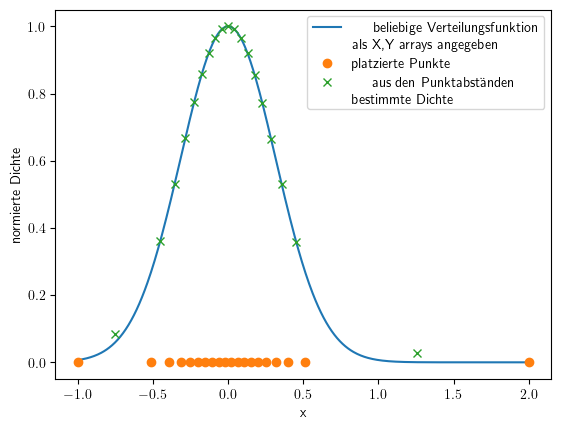

In [22]:
plot(X, Y/max(Y), label=r'beliebige Verteilungsfunktion\\als X,Y arrays angegeben')
xlabel('x')
ylabel('normierte Dichte')
plot(Xgen, [0]*len(Xgen), 'o', label=r'platzierte Punkte')
plot(dX, dDens/max(dDens), 'x', label=r'aus den Punktabst\"anden\\bestimmte Dichte')
legend()
#io.savefig('~/Desktop/gaussian-platzierung.jpg')

In [23]:
_errs = [abs((Y/max(Y))[argmin(abs(X-x))]-y)**2 for x,y in zip(dX, dDens/max(dDens))]
rmsErr = sqrt(mean(sorted(_errs)[2:-2]))
print(rmsErr)
assert rmsErr < 1e-2

0.0025282416360867463


### Tophat

In [24]:
X = linspace(-1, 2, 500)
Y = arctan( 1e5 * ( exp(-5*X**2) - .5 ) )/pi + .5
Xgen = generatePointsWithGivenDensity1D(density=(X,Y), N=10)
dX, dDens = calcDiffDensity(Xgen)

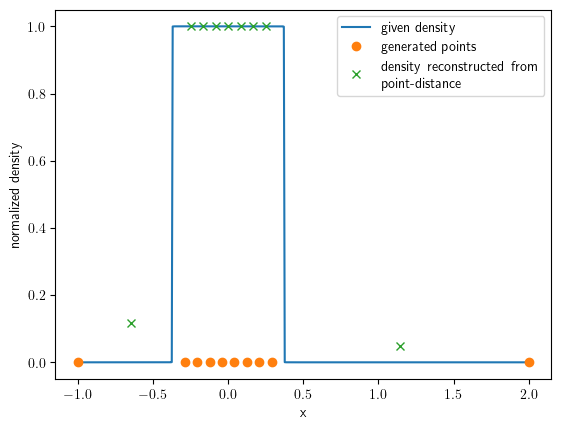

In [25]:
plot(X, Y/max(Y), label=r'given density')
xlabel('x')
ylabel('normalized density')
plot(Xgen, [0]*len(Xgen), 'o', label=r'generated points')
plot(dX, dDens/max(dDens), 'x', label=r'\parbox{4cm}{density reconstructed from point-distance}')
legend()

In [26]:
_errs = [abs((Y/max(Y))[argmin(abs(X-x))]-y)**2 for x,y in zip(dX, dDens/max(dDens))]
rmsErr = sqrt(mean(sorted(_errs)[2:-2]))
print(rmsErr)
assert rmsErr < 1e-5

2.6999287160525203e-07


### tests distorted gaussian

In [27]:
X = linspace(-1, 3, 500)
Y = arctan( 20*exp(-5*X**2) ) * (1+X)
Xgen = generatePointsWithGivenDensity1D(density=(X,Y), N=25)
dX, dDens = calcDiffDensity(Xgen)

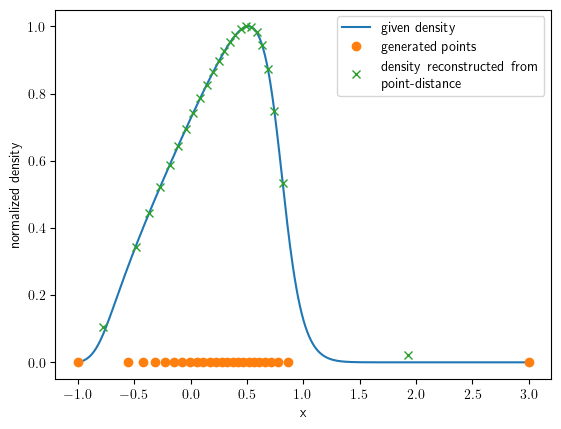

In [28]:
plot(X, Y/max(Y), label=r'given density')
xlabel('x')
ylabel('normalized density')
plot(Xgen, [0]*len(Xgen), 'o', label=r'generated points')
plot(dX, dDens/max(dDens), 'x', label=r'\parbox{4cm}{density reconstructed from point-distance}')
legend()

In [29]:
_errs = [abs((Y/max(Y))[argmin(abs(X-x))]-y)**2 for x,y in zip(dX, dDens/max(dDens))]
rmsErr = sqrt(mean(sorted(_errs)[2:-2]))
print(rmsErr)
assert rmsErr < 1e-2

0.003506911757788641


### Test distribution with multiple maxima

In [30]:
X = linspace(-1, 5, 500)
Y = exp(-5*X**2) + 0.7*exp(-5*(X-2)**2) 
Xgen = generatePointsWithGivenDensity1D(density=(X,Y), N=50)
dX, dDens = calcDiffDensity(Xgen)

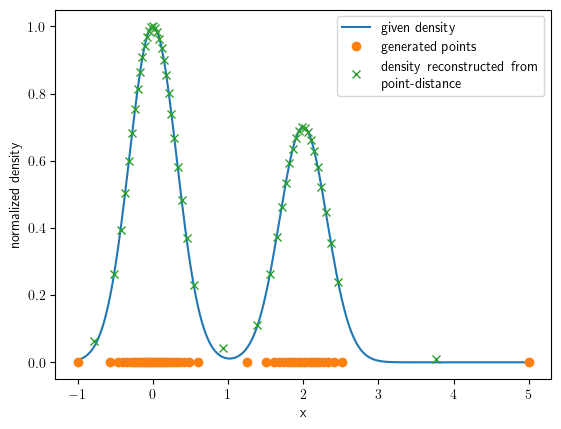

In [31]:
plot(X, Y/max(Y), label=r'given density')
xlabel('x')
ylabel('normalized density')
plot(Xgen, [0]*len(Xgen), 'o', label=r'generated points')
plot(dX, dDens/max(dDens), 'x', label=r'\parbox{4cm}{density reconstructed from point-distance}')
legend()

In [32]:
_errs = [abs((Y/max(Y))[argmin(abs(X-x))]-y)**2 for x,y in zip(dX, dDens/max(dDens))]
rmsErr = sqrt(mean(sorted(_errs)[2:-2]))
print(rmsErr)
assert rmsErr < 1e-2

0.00503640040732626


### same with more points

In [33]:
X = linspace(-1, 5, 500)
Y = exp(-5*X**2) + 0.7*exp(-5*(X-2)**2)
Xgen = generatePointsWithGivenDensity1D(density=(X,Y), N=5000)
dX, dDens = calcDiffDensity(Xgen)

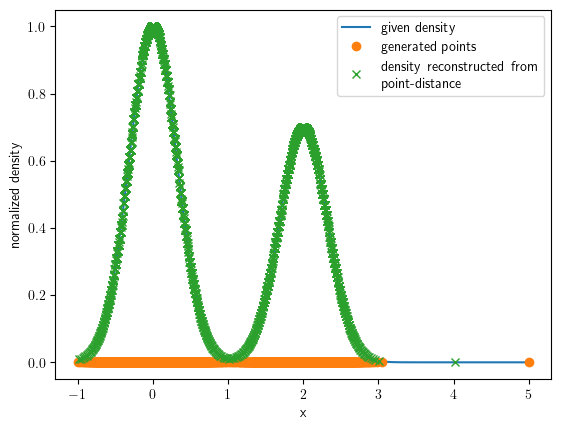

In [34]:
plot(X, Y/max(Y), label=r'given density')
xlabel('x')
ylabel('normalized density')
plot(Xgen, [0]*len(Xgen), 'o', label=r'generated points')
plot(dX, dDens/max(dDens), 'x', label=r'\parbox{4cm}{density reconstructed from point-distance}')
legend()

In [35]:
_errs = [abs((Y/max(Y))[argmin(abs(X-x))]-y)**2 for x,y in zip(dX, dDens/max(dDens))]
rmsErr = sqrt(mean(sorted(_errs)[2:-2]))
print(rmsErr)
assert rmsErr < 1e-3

0.0008878910348042713
